# Introduction

In this project, we are working with a large dataset that is approximately 18GB in size. The dataset contains valuable information that is relevant to our thesis research. However, due to its large size, it is impractical to work with the entire dataset for our analysis.

Therefore, our first step is to explore the original dataset and come up with strategies to sample a smaller subset of data that is representative of the entire dataset. By sampling a smaller set of data, we can reduce the computational requirements and processing time while still obtaining meaningful insights for our thesis purpose.

In this notebook, we will walk through the process of exploring the original dataset, understanding its structure, and devising a sampling strategy to create a smaller dataset that meets our research needs. We will leverage various data manipulation techniques and tools to efficiently sample the data and ensure that the resulting subset is representative of the original dataset.

By effectively sampling a smaller set of data, we can streamline our analysis, improve computational efficiency, and focus on the specific aspects of the dataset that are relevant to our thesis research. Let's dive into the exploration and sampling process to create a manageable dataset for our thesis analysis.


In [4]:
import json

file_path = "Data/dblp_v14.json"
max_lines = 4000

# Generate the output file path based on the max_lines value
output_file_path = f"ProcessedData/first_{max_lines}_papers.json"

# Open the JSON file for reading
with open(file_path, 'r', encoding='utf-8') as json_file:
    # Initialize a counter to keep track of the lines collected
    line_count = 0
    
    # Initialize a list to store the first 1000 lines
    first_lines = []
    
    # Iterate through the JSON file line by line
    for line in json_file:
        line_count += 1
        first_lines.append(line.strip())  # Strip leading/trailing whitespace
        
        # Check if we've collected the desired number of lines
        if line_count >= max_lines:
            break

# print out the first 3 lines to have a look at the data
for line in first_lines[:3]:
    print(line)


# Write the first lines to a new JSON file which can be used to checked the data
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    output_file.write("[\n")
    output_file.write("\n".join(first_lines))  # Join lines with commas
    output_file.write("\n]")

print(f"Saved the first {line_count} lines as JSON objects to {output_file_path}")


[
{"id": "53e99784b7602d9701f3ffdd", "title": "Flow.", "doi": "10.1145/1280120.1280225", "issue": "10", "keywords": [], "lang": "en", "venue": {"raw": "SIGGRAPH Art Gallery"}, "year": 2006, "n_citation": 15, "page_start": "", "page_end": "", "volume": "", "issn": "", "isbn": "", "url": [], "abstract": "", "authors": [{"id": "53f43776dabfaee0d9b6e75b", "name": "Masa Inakage", "org": ""}], "doc_type": "Conference"},
{"id": "53e99785b7602d9701f41492", "title": "Dancing", "doi": "10.1145/281388.281845", "issue": "19", "keywords": [], "lang": "en", "venue": {"raw": "ACM SIGGRAPH 98 Electronic art and animation catalog"}, "year": 1998, "n_citation": 0, "page_start": "116", "page_end": "116", "volume": "3", "issn": "0036-8733", "isbn": "1-58113-045-7", "url": ["http://dx.doi.org/10.1145/281388.281845", "http://dx.doi.org/10.1038/scientificamerican01291848-147h", "http://www.nature.com/scientificamerican/journal/v3/n19/full/scientificamerican01291848-147h.html", "http://dx.doi.org/doi:10.1038/

From the previous step, we have observed that the dataset consists of nested complex JSON objects. To perform descriptive analysis on the original database, we will initially focus on extracting the year and number of citations for each record. This will provide us with valuable insights into the dataset's temporal distribution and the impact of the publications.


In [14]:
%%time
import json
import pandas as pd
import h5py
#this variable was used for debugging purposes. It is not needed anymore
max_lines = 1000000000000000

file_path = "Data/dblp_v14.json"
output_csv_file = "ProcessedData/years_and_n_citation.csv"  # Specify the Excel file name

# Initialize lists to store the "year" and "n_citation" values
years = []
n_citations = []

# Open the JSON file for reading
with open(file_path, 'r', encoding='utf-8') as json_file:
    # Iterate through the JSON file line by line
    for line_number, line in enumerate(json_file, start=1):
        try:
            if len(line) > 10:
                data = json.loads(line.strip().strip(',]'))

                years.append(data.get("year", None))  # Append "year" value or None if it's missing
                n_citations.append(data.get("n_citation", None))  # Append "n_citation" value or None if it's missing
        except json.JSONDecodeError as e:
            print(f"Error at line {line_number}: {e}")

        if line_number >= max_lines:
            break

# Create a DataFrame from the "years" and "n_citation" lists
df = pd.DataFrame({"Year": years, "n_citation": n_citations})

# Export the DataFrame to an Excel file
df.to_csv(output_csv_file, index=False)

print(f"Exported {len(years)} 'year' and 'n_citation' values to {output_csv_file}")


Exported 5259858 'year' and 'n_citation' values to ProcessedData/years_and_n_citation.csv
Wall time: 5min 30s


# Descriptive analysis for the entire database

Histogram of papers by year is presented below. Please note that for some papers there is no year data. 

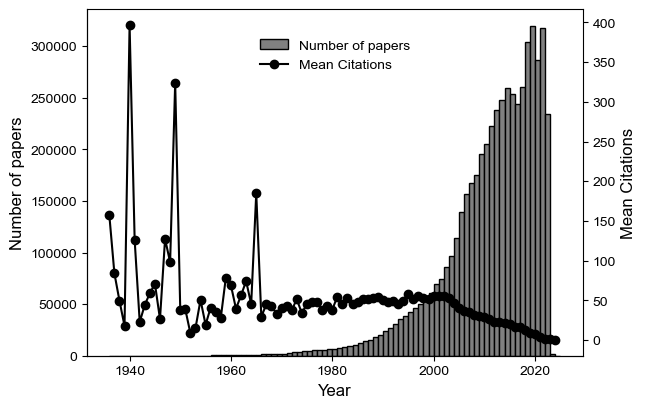

In [132]:
import pandas as pd

import matplotlib.pyplot as plt

# Define the input file name (CSV)
input_file = 'ProcessedData/years_and_n_citation.csv'

# Read the CSV file
df = pd.read_csv(input_file)

# Filter the DataFrame to include only years greater than 0
df_filtered = df[df['Year'] > 0]

# Get the minimum and maximum years to define bin edges
min_year = df_filtered['Year'].min()
max_year = df_filtered['Year'].max()

# Define the bin edges, one per year
bin_edges = list(range(int(min_year), int(max_year) + 2))  # Adding 2 to include the maximum year

# Calculate the mean number of citations per year
mean_citations_per_year = df_filtered.groupby('Year')['n_citation'].mean()

# Increase the figure size for better readability
fig, ax1 = plt.subplots(figsize=(6.4, 4.5))  # Adjust the width (10) and height (6) as needed

# Create a histogram of the filtered dataset with one year per bin
ax1.hist(df_filtered['Year'], bins=bin_edges, color='gray', edgecolor='black', label='Number of papers')

# Remove the title of the graph
ax1.set_title('')

# Set the axis labels for the histogram
ax1.set_xlabel('Year', fontsize=12, fontname='Arial')
ax1.set_ylabel('Number of papers', fontsize=12, fontname='Arial')

# Set the tick label font size and style for the histogram
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.xticks(fontsize=10, fontname='Arial')
plt.yticks(fontsize=10, fontname='Arial')

# Remove the top and right spines for a cleaner look
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Create a second y-axis for the scatter line
ax2 = ax1.twinx()
ax2.plot(mean_citations_per_year.index, mean_citations_per_year.values, color='black', marker='o', linestyle='-', label='Mean Citations')

# Set the y-axis label for the scatter line
ax2.set_ylabel('Mean Citations', fontsize=12, fontname='Arial')

# Set the tick label font size and style for the scatter line
ax2.tick_params(axis='y', labelsize=10)
plt.yticks(fontsize=10, fontname='Arial')

# Move the legend to the top center and remove the border line
legend = fig.legend(loc="upper center", bbox_to_anchor=(0.5, 0.95), bbox_transform=ax1.transAxes, frameon=False)

# Set the legend font size and style
for text in legend.get_texts():
    text.set_fontsize(10)
    text.set_fontname('Arial')

# Remove grid lines for a cleaner appearance
ax1.grid(False)
ax2.grid(False)

# Save the plot as an image file with high resolution
plt.savefig('Graphs/histogram_apa_style_with_citations_secondary_axis.png', dpi=1600, bbox_inches='tight')

# Show the plot
plt.show()



Next, descriptive statistics for the number of citations are presented. These statistics provide insights into the distribution and characteristics of the citation counts in the dataset. By analyzing these statistics, we can gain a better understanding of the impact and popularity of the publications in the dataset.

In [41]:
import pandas as pd
from tabulate import tabulate

# Load the Excel file into a pandas DataFrame
file_path = 'ProcessedData/years_and_n_citation.csv'
df = pd.read_csv(file_path)

# Calculate descriptive statistics for 'n_citation' overall
overall_stats = df['n_citation'].describe()

# Calculate descriptive statistics for 'n_citation' in the year 2010
year_2010_stats = df[df['Year'] == 2010]['n_citation'].describe()

# Format the descriptive statistics as tables
overall_stats_table = tabulate(overall_stats.reset_index(), headers=['Statistic', 'Value'], tablefmt='grid')
year_2010_stats_table = tabulate(year_2010_stats.reset_index(), headers=['Statistic', 'Value'], tablefmt='grid')

# Print the descriptive statistics tables
print("Descriptive Statistics for 'n_citation' Overall:")
#print(overall_stats_table)
print(overall_stats)


print("\nDescriptive Statistics for 'n_citation' in Year 2010:")
#print(year_2010_stats_table)
print(year_2010_stats)

Descriptive Statistics for 'n_citation' Overall:
count    5.259858e+06
mean     2.557821e+01
std      2.675704e+02
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e+00
75%      1.500000e+01
max      1.493590e+05
Name: n_citation, dtype: float64

Descriptive Statistics for 'n_citation' in Year 2010:
count    205369.000000
mean         28.698397
std         193.925635
min           0.000000
25%           1.000000
50%           6.000000
75%          21.000000
max       28920.000000
Name: n_citation, dtype: float64


There are several factors that can impact the citation data of research papers. One of the key factors is the topic of the paper, as it determines the relevance and interest of the research. Additionally, the year in which a paper is published can also play a significant role in its citation count.

To gain insights into the relationship between the publication year and the citation count, we have calculated the mean citation count for papers published in each year. This analysis allows us to understand the average impact and popularity of papers across different years.

By examining the mean citation count by year, we can identify trends and patterns in the citation behavior of papers over time. This information can be valuable in understanding the dynamics of research impact and can guide future research strategies.

In the next steps of our analysis, we will further explore the relationship between other factors, such as the topic of the paper, and the citation count. This will provide a comprehensive understanding of the various factors that influence the citation data and help us make informed decisions in our research.


In [24]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
file_path = 'ProcessedData/years_and_n_citation.csv'
df = pd.read_csv(file_path)

# Calculate the mean number of citations per year
mean_citations_per_year = df.groupby('Year')['n_citation'].mean()

# Calculate the count of records per year
count_records_per_year = df.groupby('Year').size()

# Create a DataFrame to store the results
result_df = pd.DataFrame({
    'Year': mean_citations_per_year.index,
    'Mean Citation': mean_citations_per_year.values,
    'Count of Records': count_records_per_year.values
})

# Export the outcome to Excel
output_file = 'ProcessedData/citations_and_records_per_year.xlsx'
result_df.to_excel(output_file, index=False)

# Display the result DataFrame
print(result_df)

    Year  Mean Citation  Count of Records
0      0       4.875000                32
1   1936     157.250000                12
2   1937      84.000000                15
3   1938      49.500000                10
4   1939      17.777778                18
5   1940     396.800000                10
6   1941     125.833333                12
7   1942      22.583333                12
8   1943      44.250000                 8
9   1944      58.800000                 5
10  1945      70.875000                 8
11  1946      26.354839                31
12  1947     127.400000                10
13  1948      97.967742                31
14  1949     323.920000                50
15  1950      38.041667                24
16  1951      38.593750                32
17  1952       8.450000               100
18  1953      14.641026               156
19  1954      50.465000               200
20  1955      19.133690               187
21  1956      40.834459               296
22  1957      35.552817           

## Research Objective

The primary objective of this research is to employ topic modeling techniques to conduct an in-depth analysis of academic papers. Our analysis will focus on the abstracts of these papers, as they provide concise summaries of the research findings and methodologies. To ensure a focused and manageable study, we have selected a subset of papers published in the year 2010. This selection will enable us to explore the prevailing research themes and methodologies of that period, offering valuable insights into the academic discourse.

### Data Requirements

For the analysis conducted in this notebook, we will utilize two key variables for each paper:
- **Abstract**: This will serve as the input for topic modeling.
- **Number of Citations**: This will be used to evaluate the impact of the identified topics.

By analyzing these variables, we aim to uncover significant patterns and trends within the academic literature of 2010.

However, it appears that certain papers do not have an abstract. These papers are fitlered out. 
In addition, it appears that even by considering only the papers published in 2010, the large number of papers and their size pose a challenge for the next step of topic modeling. To address this, a sampled subset of the papers has been created. Both the sampled subset and the complete dataset are saved in both CSV and JSON formats for further analysis and convenience.


In [9]:
%%time
import json
import pandas as pd

max_lines = 100000000000000000

file_path = "Data/dblp_v14.json"
output_csv_file = "ProcessedData/year_2010_records_with_non_empty_abstract.csv"  # Specify the CSV file name
output_json_file = "ProcessedData/year_2010_records_with_non_empty_abstract.json"  # Specify the JSON file name
output_sampled_json_file = "ProcessedData/sampled_year_2010_records.json"  # Specify the sampled JSON file name

# Initialize lists to store the "year," "n_citation," and "abstract" values
years = []
n_citations = []
abstracts = []

# Open the JSON file for reading
with open(file_path, 'r', encoding='utf-8') as json_file:
    # Iterate through the JSON file line by line
    for line_number, line in enumerate(json_file, start=1):
        try:
            if len(line) > 10:
                data = json.loads(line.strip().strip(',]'))

                year = data.get("year", None)
                abstract = data.get("abstract", None)
                
                if year == 2010 and abstract:  # Check if "year" is 2010 and "abstract" is not empty
                    years.append(year)
                    n_citations.append(data.get("n_citation", None))
                    abstracts.append(abstract)
        except json.JSONDecodeError as e:
            print(f"Error at line {line_number}: {e}")

        if line_number >= max_lines:
            break

# Create the original DataFrame from the filtered data
df = pd.DataFrame({"Year": years, "n_citation": n_citations, "Abstract": abstracts})

# Export the original DataFrame to a CSV file
df.to_csv(output_csv_file, index=False)

# Save the original DataFrame as a JSON file
df.to_json(output_json_file, orient='records', lines=True)

print(f"Exported {len(years)} records with 'year' equal to 2010 and non-empty 'abstract' to {output_csv_file}")
print(f"Exported {len(years)} records with 'year' equal to 2010 and non-empty 'abstract' to {output_json_file}")

# Perform random sampling of 5% of the DataFrame
sampled_df = df.sample(frac=0.05, random_state=42)  # 5% sampling rate with a random seed (42)

# Save the sampled DataFrame as a JSON file
sampled_df.to_json(output_sampled_json_file, orient='records', lines=True)

print(f"Exported {len(sampled_df)} sampled records to {output_sampled_json_file}")



Exported 176844 records with 'year' equal to 2010 and non-empty 'abstract' to ProcessedData/year_2010_records_with_non_empty_abstract.csv
Exported 176844 records with 'year' equal to 2010 and non-empty 'abstract' to ProcessedData/year_2010_records_with_non_empty_abstract.json
Exported 8842 sampled records to ProcessedData/sampled_year_2010_records.json
Wall time: 5min 17s


In [2]:
import pandas as pd
citation = pd.read_csv('ProcessedData/n_citation_data.csv')
citation['n_citation'].describe()

count     8842.000000
mean        30.369713
std        142.617448
min          0.000000
25%          2.000000
50%          8.000000
75%         24.000000
max      10010.000000
Name: n_citation, dtype: float64

Next, we explore the distribution of the citation numbers. 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, kstest


df = citation


# Conduct normality tests
stat_shapiro, p_value_shapiro = shapiro(df['n_citation'])
stat_dagostino, p_value_dagostino = normaltest(df['n_citation'])
stat_ks, p_value_ks = kstest(df['n_citation'], 'norm')

print(f'Shapiro-Wilk Test: Statistics={stat_shapiro}, p-value={p_value_shapiro}')
print(f'D\'Agostino\'s K^2 Test: Statistics={stat_dagostino}, p-value={p_value_dagostino}')
print(f'Kolmogorov-Smirnov Test: Statistics={stat_ks}, p-value={p_value_ks}')

# Interpretation of p-values
alpha = 0.05
if p_value_shapiro > alpha:
    print('Shapiro-Wilk Test: Sample looks Gaussian (fail to reject H0)')
else:
    print('Shapiro-Wilk Test: Sample does not look Gaussian (reject H0)')

if p_value_dagostino > alpha:
    print('D\'Agostino\'s K^2 Test: Sample looks Gaussian (fail to reject H0)')
else:
    print('D\'Agostino\'s K^2 Test: Sample does not look Gaussian (reject H0)')

if p_value_ks > alpha:
    print('Kolmogorov-Smirnov Test: Sample looks Gaussian (fail to reject H0)')
else:
    print('Kolmogorov-Smirnov Test: Sample does not look Gaussian (reject H0)')


Shapiro-Wilk Test: Statistics=0.13504594564437866, p-value=0.0
D'Agostino's K^2 Test: Statistics=26454.571461017855, p-value=0.0
Kolmogorov-Smirnov Test: Statistics=0.7528662444372539, p-value=0.0
Shapiro-Wilk Test: Sample does not look Gaussian (reject H0)
D'Agostino's K^2 Test: Sample does not look Gaussian (reject H0)
Kolmogorov-Smirnov Test: Sample does not look Gaussian (reject H0)


c:\Users\inrus\anaconda3\envs\myenv\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


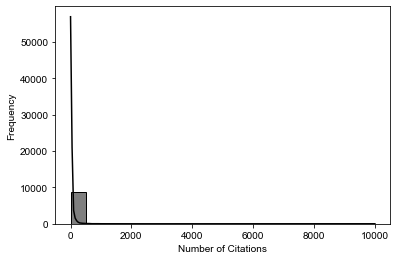

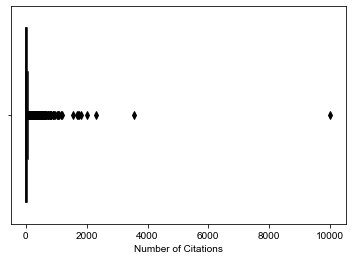

In [18]:
# Set the font to Arial and color palette to grayscale
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
sns.set_palette('gray')

# Histogram with specified bins
plt.figure(figsize=(6, 4))
sns.histplot(citation['n_citation'], kde=True, bins=20, color='black')
plt.xlabel('Number of Citations')
plt.ylabel('Frequency')
plt.savefig('Graphs/histogram_n_citation.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=citation['n_citation'], color='black')
plt.xlabel('Number of Citations')
plt.savefig('Graphs/boxplot_n_citation.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()



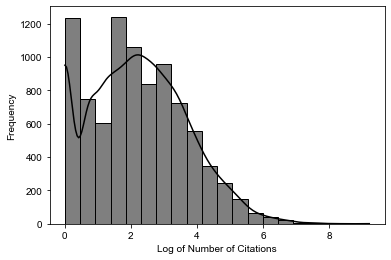

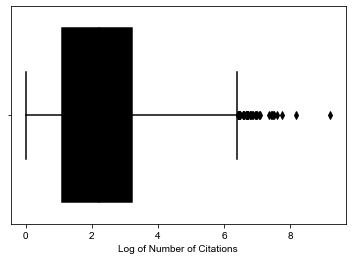

Shapiro-Wilk Test: Statistics=0.9672849178314209, p-value=1.0900280364443455e-40
D'Agostino's K^2 Test: Statistics=223.8865666249643, p-value=2.4190774397145423e-49
Kolmogorov-Smirnov Test: Statistics=0.06986804374750444, p-value=5.628260350566405e-38
Shapiro-Wilk Test: Sample does not look Gaussian (reject H0)
D'Agostino's K^2 Test: Sample does not look Gaussian (reject H0)
Kolmogorov-Smirnov Test: Sample does not look Gaussian (reject H0)


c:\Users\inrus\anaconda3\envs\myenv\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [17]:
# Apply log transformation to handle skewness
citation['log_n_citation'] = np.log1p(citation['n_citation'])

# Set the font to Arial and color palette to grayscale
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
sns.set_palette('gray')

# Histogram with specified bins
plt.figure(figsize=(6, 4))
sns.histplot(citation['log_n_citation'], kde=True, bins=20, color='black')
plt.xlabel('Log of Number of Citations')
plt.ylabel('Frequency')
plt.savefig('Graphs/histogram_log_n_citation.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=citation['log_n_citation'], color='black')
plt.xlabel('Log of Number of Citations')
plt.savefig('Graphs/boxplot_log_n_citation.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Conduct normality tests on the log-transformed data
stat_shapiro, p_value_shapiro = shapiro(citation['log_n_citation'])
stat_dagostino, p_value_dagostino = normaltest(citation['log_n_citation'])
stat_ks, p_value_ks = kstest(citation['log_n_citation'], 'norm', args=(citation['log_n_citation'].mean(), citation['log_n_citation'].std()))

print(f'Shapiro-Wilk Test: Statistics={stat_shapiro}, p-value={p_value_shapiro}')
print(f'D\'Agostino\'s K^2 Test: Statistics={stat_dagostino}, p-value={p_value_dagostino}')
print(f'Kolmogorov-Smirnov Test: Statistics={stat_ks}, p-value={p_value_ks}')

# Interpretation of p-values
alpha = 0.05
if p_value_shapiro > alpha:
    print('Shapiro-Wilk Test: Sample looks Gaussian (fail to reject H0)')
else:
    print('Shapiro-Wilk Test: Sample does not look Gaussian (reject H0)')

if p_value_dagostino > alpha:
    print('D\'Agostino\'s K^2 Test: Sample looks Gaussian (fail to reject H0)')
else:
    print('D\'Agostino\'s K^2 Test: Sample does not look Gaussian (reject H0)')

if p_value_ks > alpha:
    print('Kolmogorov-Smirnov Test: Sample looks Gaussian (fail to reject H0)')
else:
    print('Kolmogorov-Smirnov Test: Sample does not look Gaussian (reject H0)')